https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac
1. Take a 3 layer neural network. (1 input layer + 1 hidden layer + 1 output layer)
2. Feed it a word and train it to predict its neighbouring word.
3. Remove the last (output layer) and keep the input and hidden layer.
4. Now, input a word from within the vocabulary. The output given at the hidden layer is the ‘word embedding’ of the input word.

In [1]:
import numpy as np
import tensorflow as tf

corpus_raw = 'He is the king . The king is royal . She is the royal queen '

# convert to lower case
corpus_raw = corpus_raw.lower()

In [2]:
# we will create a dictionary which translates words to integers and 
#integers to words. This will come in handy later.

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [4]:
# we want a list of our sentences as a list of words
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [5]:
#we will generate our training data
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [6]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [7]:
print(x_train)

[[ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0

In [8]:
print(x_train.shape, y_train.shape)
# meaning 34 training points, where each point has 7 dimensions

(34, 7) (34, 7)


In [9]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [10]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [11]:
#Train it
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  3.96393
loss is :  3.58571
loss is :  3.3374
loss is :  3.15695
loss is :  3.01624
loss is :  2.902
loss is :  2.80737
loss is :  2.72816
loss is :  2.6612
loss is :  2.60378
loss is :  2.55357
loss is :  2.50878
loss is :  2.46808
loss is :  2.43057
loss is :  2.39563
loss is :  2.36287
loss is :  2.332
loss is :  2.30281
loss is :  2.27516
loss is :  2.2489
loss is :  2.22395
loss is :  2.2002
loss is :  2.17759
loss is :  2.15603
loss is :  2.13547
loss is :  2.11584
loss is :  2.09708
loss is :  2.07915
loss is :  2.06198
loss is :  2.04555
loss is :  2.0298
loss is :  2.01469
loss is :  2.00019
loss is :  1.98626
loss is :  1.97287
loss is :  1.95999
loss is :  1.94759
loss is :  1.93563
loss is :  1.92411
loss is :  1.91299
loss is :  1.90226
loss is :  1.89189
loss is :  1.88186
loss is :  1.87216
loss is :  1.86277
loss is :  1.85367
loss is :  1.84486
loss is :  1.83631
loss is :  1.82802
loss is :  1.81997
loss is :  1.81215
loss is :  1.80456
loss is :  1.79718
lo

loss is :  1.39011
loss is :  1.38995
loss is :  1.38979
loss is :  1.38962
loss is :  1.38946
loss is :  1.3893
loss is :  1.38914
loss is :  1.38898
loss is :  1.38882
loss is :  1.38866
loss is :  1.3885
loss is :  1.38835
loss is :  1.38819
loss is :  1.38803
loss is :  1.38787
loss is :  1.38772
loss is :  1.38756
loss is :  1.38741
loss is :  1.38725
loss is :  1.3871
loss is :  1.38695
loss is :  1.38679
loss is :  1.38664
loss is :  1.38649
loss is :  1.38634
loss is :  1.38618
loss is :  1.38603
loss is :  1.38588
loss is :  1.38573
loss is :  1.38558
loss is :  1.38543
loss is :  1.38529
loss is :  1.38514
loss is :  1.38499
loss is :  1.38484
loss is :  1.3847
loss is :  1.38455
loss is :  1.3844
loss is :  1.38426
loss is :  1.38411
loss is :  1.38397
loss is :  1.38383
loss is :  1.38368
loss is :  1.38354
loss is :  1.3834
loss is :  1.38325
loss is :  1.38311
loss is :  1.38297
loss is :  1.38283
loss is :  1.38269
loss is :  1.38255
loss is :  1.38241
loss is :  1.38227

loss is :  1.34543
loss is :  1.34538
loss is :  1.34533
loss is :  1.34528
loss is :  1.34522
loss is :  1.34517
loss is :  1.34512
loss is :  1.34507
loss is :  1.34502
loss is :  1.34497
loss is :  1.34492
loss is :  1.34486
loss is :  1.34481
loss is :  1.34476
loss is :  1.34471
loss is :  1.34466
loss is :  1.34461
loss is :  1.34456
loss is :  1.34451
loss is :  1.34446
loss is :  1.34441
loss is :  1.34436
loss is :  1.34431
loss is :  1.34426
loss is :  1.34421
loss is :  1.34416
loss is :  1.34411
loss is :  1.34407
loss is :  1.34402
loss is :  1.34397
loss is :  1.34392
loss is :  1.34387
loss is :  1.34382
loss is :  1.34377
loss is :  1.34372
loss is :  1.34368
loss is :  1.34363
loss is :  1.34358
loss is :  1.34353
loss is :  1.34348
loss is :  1.34344
loss is :  1.34339
loss is :  1.34334
loss is :  1.34329
loss is :  1.34325
loss is :  1.3432
loss is :  1.34315
loss is :  1.34311
loss is :  1.34306
loss is :  1.34301
loss is :  1.34297
loss is :  1.34292
loss is :  1.

loss is :  1.33083
loss is :  1.33082
loss is :  1.3308
loss is :  1.33078
loss is :  1.33077
loss is :  1.33075
loss is :  1.33074
loss is :  1.33072
loss is :  1.3307
loss is :  1.33069
loss is :  1.33067
loss is :  1.33066
loss is :  1.33064
loss is :  1.33063
loss is :  1.33061
loss is :  1.3306
loss is :  1.33058
loss is :  1.33057
loss is :  1.33055
loss is :  1.33053
loss is :  1.33052
loss is :  1.3305
loss is :  1.33049
loss is :  1.33047
loss is :  1.33046
loss is :  1.33044
loss is :  1.33043
loss is :  1.33041
loss is :  1.3304
loss is :  1.33038
loss is :  1.33037
loss is :  1.33035
loss is :  1.33034
loss is :  1.33033
loss is :  1.33031
loss is :  1.3303
loss is :  1.33028
loss is :  1.33027
loss is :  1.33025
loss is :  1.33024
loss is :  1.33022
loss is :  1.33021
loss is :  1.33019
loss is :  1.33018
loss is :  1.33016
loss is :  1.33015
loss is :  1.33014
loss is :  1.33012
loss is :  1.33011
loss is :  1.33009
loss is :  1.33008
loss is :  1.33007
loss is :  1.33005

loss is :  1.32615
loss is :  1.32615
loss is :  1.32614
loss is :  1.32614
loss is :  1.32613
loss is :  1.32613
loss is :  1.32612
loss is :  1.32611
loss is :  1.32611
loss is :  1.3261
loss is :  1.3261
loss is :  1.32609
loss is :  1.32608
loss is :  1.32608
loss is :  1.32607
loss is :  1.32607
loss is :  1.32606
loss is :  1.32606
loss is :  1.32605
loss is :  1.32604
loss is :  1.32604
loss is :  1.32603
loss is :  1.32603
loss is :  1.32602
loss is :  1.32602
loss is :  1.32601
loss is :  1.326
loss is :  1.326
loss is :  1.32599
loss is :  1.32599
loss is :  1.32598
loss is :  1.32598
loss is :  1.32597
loss is :  1.32597
loss is :  1.32596
loss is :  1.32595
loss is :  1.32595
loss is :  1.32594
loss is :  1.32594
loss is :  1.32593
loss is :  1.32593
loss is :  1.32592
loss is :  1.32592
loss is :  1.32591
loss is :  1.32591
loss is :  1.3259
loss is :  1.32589
loss is :  1.32589
loss is :  1.32588
loss is :  1.32588
loss is :  1.32587
loss is :  1.32587
loss is :  1.32586


loss is :  1.32424
loss is :  1.32423
loss is :  1.32423
loss is :  1.32423
loss is :  1.32422
loss is :  1.32422
loss is :  1.32422
loss is :  1.32422
loss is :  1.32421
loss is :  1.32421
loss is :  1.32421
loss is :  1.3242
loss is :  1.3242
loss is :  1.3242
loss is :  1.3242
loss is :  1.32419
loss is :  1.32419
loss is :  1.32419
loss is :  1.32418
loss is :  1.32418
loss is :  1.32418
loss is :  1.32418
loss is :  1.32417
loss is :  1.32417
loss is :  1.32417
loss is :  1.32416
loss is :  1.32416
loss is :  1.32416
loss is :  1.32416
loss is :  1.32415
loss is :  1.32415
loss is :  1.32415
loss is :  1.32415
loss is :  1.32414
loss is :  1.32414
loss is :  1.32414
loss is :  1.32413
loss is :  1.32413
loss is :  1.32413
loss is :  1.32413
loss is :  1.32412
loss is :  1.32412
loss is :  1.32412
loss is :  1.32411
loss is :  1.32411
loss is :  1.32411
loss is :  1.32411
loss is :  1.3241
loss is :  1.3241
loss is :  1.3241
loss is :  1.3241
loss is :  1.32409
loss is :  1.32409
l

loss is :  1.32317
loss is :  1.32317
loss is :  1.32317
loss is :  1.32317
loss is :  1.32317
loss is :  1.32316
loss is :  1.32316
loss is :  1.32316
loss is :  1.32316
loss is :  1.32316
loss is :  1.32316
loss is :  1.32315
loss is :  1.32315
loss is :  1.32315
loss is :  1.32315
loss is :  1.32315
loss is :  1.32315
loss is :  1.32315
loss is :  1.32314
loss is :  1.32314
loss is :  1.32314
loss is :  1.32314
loss is :  1.32314
loss is :  1.32314
loss is :  1.32313
loss is :  1.32313
loss is :  1.32313
loss is :  1.32313
loss is :  1.32313
loss is :  1.32313
loss is :  1.32312
loss is :  1.32312
loss is :  1.32312
loss is :  1.32312
loss is :  1.32312
loss is :  1.32312
loss is :  1.32312
loss is :  1.32311
loss is :  1.32311
loss is :  1.32311
loss is :  1.32311
loss is :  1.32311
loss is :  1.32311
loss is :  1.3231
loss is :  1.3231
loss is :  1.3231
loss is :  1.3231
loss is :  1.3231
loss is :  1.3231
loss is :  1.3231
loss is :  1.32309
loss is :  1.32309
loss is :  1.32309


loss is :  1.32257
loss is :  1.32257
loss is :  1.32257
loss is :  1.32257
loss is :  1.32257
loss is :  1.32257
loss is :  1.32257
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1

loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1.32212
loss is :  1

loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1

loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1

loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is :  1.32149
loss is

loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1.32137
loss is :  1

loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1

loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119
loss is :  1.32119

loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1.32112
loss is :  1

loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1.32106
loss is :  1

loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1

loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1

loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1.32093
loss is :  1

loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is :  1.32089
loss is : 

loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1

In [12]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-0.18480085 -0.68122405  0.4209334   0.53533238 -2.92137933]
 [ 2.18933177 -0.2100862  -1.00468767 -1.55379403  0.78607732]
 [ 3.14121079 -1.70305455 -1.14354444  0.09722504 -2.45567489]
 [-2.68395877 -1.44073045 -0.01166853 -0.81541163 -0.22520046]
 [ 1.74635375  0.76744473  0.45849663 -0.06424507  1.98781753]
 [-1.21357548  0.37077275  1.33805311  1.9249531   0.92914242]
 [ 0.61518353 -2.0206058  -0.9653368   1.07144928 -1.06109512]]
----------
[ 0.23307824 -0.76912606  1.15647137  1.43982542 -0.14034578]
----------


In [15]:
vectors = sess.run(W1 + b1)
# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)

[[  4.82773930e-02  -1.45035005e+00   1.57740474e+00   1.97515774e+00
   -3.06172514e+00]
 [  2.42241001e+00  -9.79212284e-01   1.51783705e-01  -1.13968611e-01
    6.45731568e-01]
 [  3.37428904e+00  -2.47218060e+00   1.29269361e-02   1.53705049e+00
   -2.59602070e+00]
 [ -2.45088053e+00  -2.20985651e+00   1.14480281e+00   6.24413788e-01
   -3.65546227e-01]
 [  1.97943199e+00  -1.68132782e-03   1.61496806e+00   1.37558031e+00
    1.84747171e+00]
 [ -9.80497241e-01  -3.98353308e-01   2.49452448e+00   3.36477852e+00
    7.88796663e-01]
 [  8.48261774e-01  -2.78973198e+00   1.91134572e-01   2.51127481e+00
   -1.20144093e+00]]


In [16]:
#Here’s a quick function to find the closest vector to a given vector. Beware, it’s a dirty implementation.
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [17]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

queen
king
he


In [18]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

royal -0.343097
king -0.362922
she -0.47934
the -0.619507
queen -0.000488798
is -0.0907068
he -0.691226


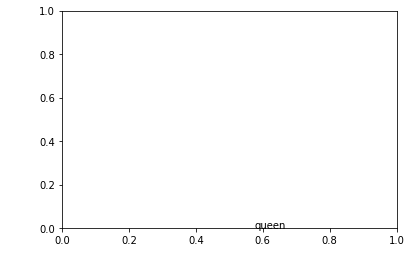

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()